# **Estudo sobre Análise de Componentes Principais (PCA)**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


O presente relatório tem como objetivo analisar e discutir aplicações de PCA em diferentes conjuntos de dados.

## **1. Exemplo *Noisy Gaussian Data***

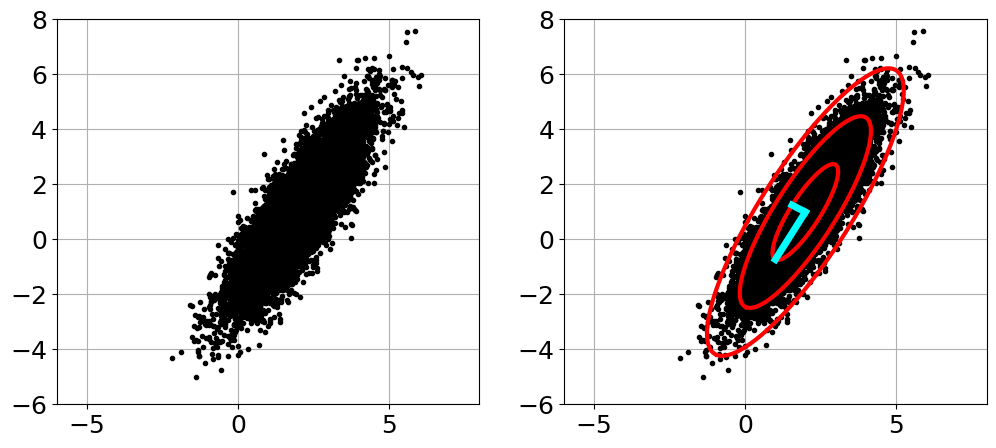

In [60]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 5]

xC = np.array([2, 1])      # Centro
sig = np.array([2, 0.5])   # Eixos principais

theta = np.pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Criar 10000 pontos
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=1)
B = X - np.tile(Xavg,(nPoints,1)).T

# Aplicar SVD para encontrar as componentes
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Mostrar as componentes principais U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

A figura acima ilustra como a decomposição em valores singulares (SVD) encontra as direções de maior variabilidade em um conjunto de pontos, representando-as por elipses de contorno (vermelhas) e vetores principais (azul claro).

## **2. Exemplo *Ovarian Cancer Data***

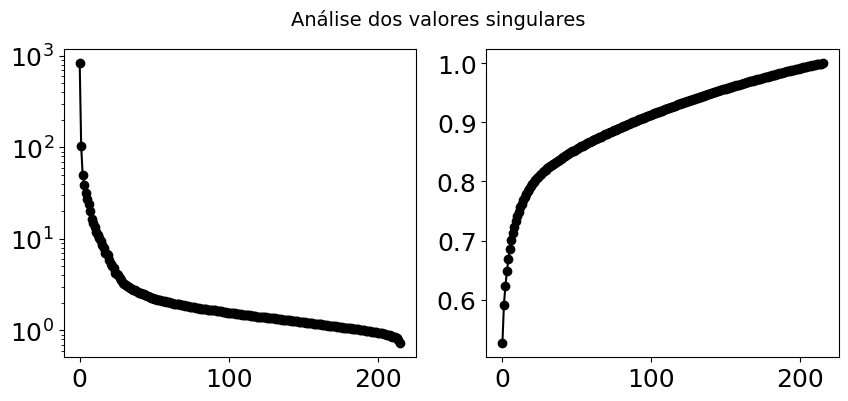

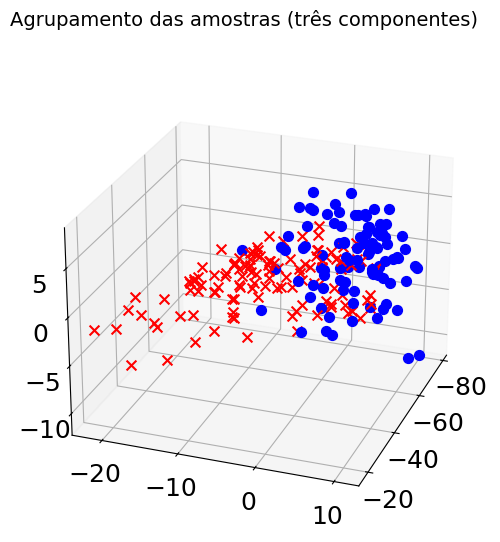

In [61]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from mpl_toolkits.mplot3d import Axes3D

url_obs = "https://bitbucket.org/cpraveen/nla/downloads/ovariancancer_obs.csv"
url_grp = "https://bitbucket.org/cpraveen/nla/downloads/ovariancancer_grp.csv"

# Carregar dados (observações)
with urllib.request.urlopen(url_obs) as response:
    obs = np.loadtxt(response, delimiter=',')

# Carregar dados (grupos)
with urllib.request.urlopen(url_grp) as response:
    grp = [line.decode('utf-8').strip() for line in response]

# print(obs.shape)
# print(grp[:10])

U, S, VT = np.linalg.svd(obs,full_matrices=0)

# Valores singulares para o conjunto de dados (ovarian cancer)
fig1 = plt.figure(figsize=(10, 4))
fig1.suptitle('Análise dos valores singulares', fontsize=14)
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

# Agrupamento das amostras normais e das com câncer nas três primeiras coordenadas
fig2 = plt.figure(figsize=(12, 6))
fig2.suptitle('Agrupamento das amostras (três componentes)', fontsize=14)
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

Na primeira figura, a análise dos valores singulares mostra uma queda rápida nos primeiros termos, indicando que a maior parte da variabilidade pode ser explicada por poucas componentes principais.

Ao projetar as amostras nas três primeiras coordenadas principais, observa-se um agrupamento claro entre os indivíduos saudáveis e aqueles com câncer, o que sugere que a redução de dimensionalidade é eficaz para separar os dois grupos.

## **3. Exemplo *Breast Cancer Data***

(569, 30)
(569,)


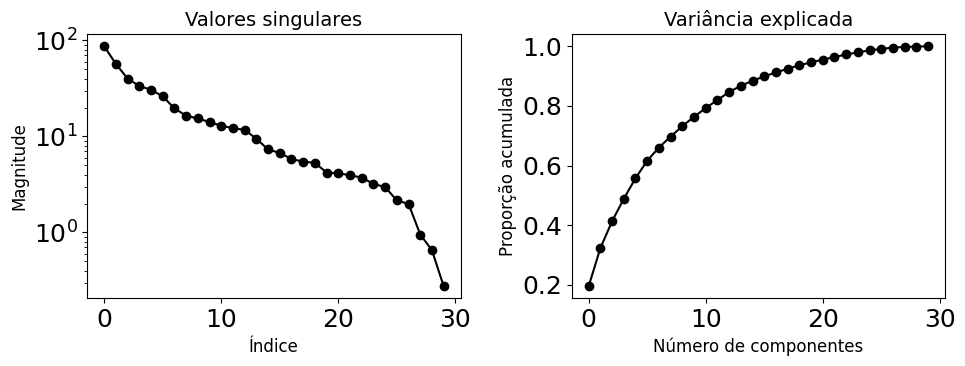

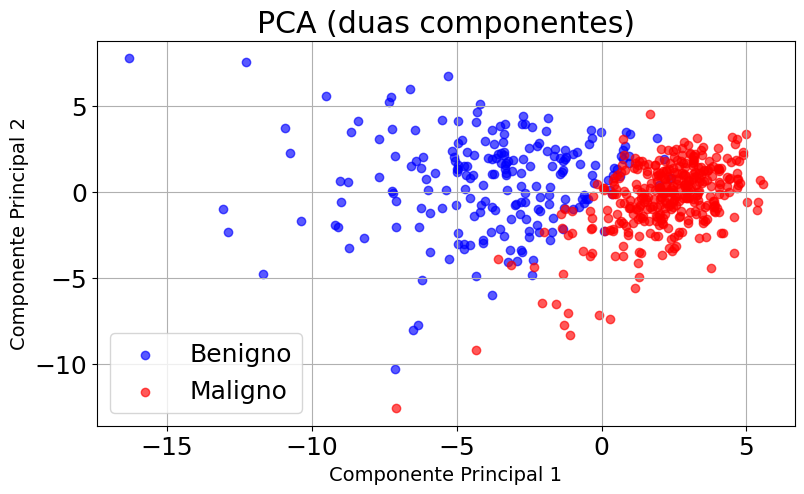

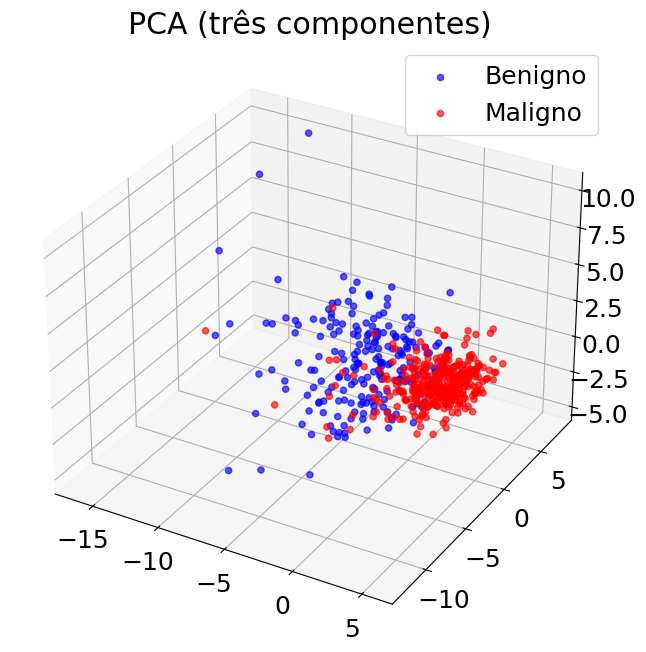

In [62]:
# Bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar o conjunto de dados (é o mesmo que está no Kaggle, porém já implementado no Google Colab)
data = datasets.load_breast_cancer(return_X_y=False, as_frame=False)

X = data.data       # Variáveis
Y = data.target     # Rótulos (0 = maligno, 1 = benigno)

print(X.shape)
print(Y.shape)

# Normalização do conjunto (média = 0, desvio = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Centralizar os dados
X_centered = X_scaled - np.mean(X_scaled, axis=0)

# SVD
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

# Análise dos valores singulares
fig1 = plt.figure(figsize=(10, 4))

ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax1.set_title('Valores singulares', fontsize=14)
ax1.set_xlabel('Índice', fontsize=12)
ax1.set_ylabel('Magnitude', fontsize=12)

ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='k')
ax2.set_title('Variância explicada', fontsize=14)
ax2.set_xlabel('Número de componentes', fontsize=12)
ax2.set_ylabel('Proporção acumulada', fontsize=12)

plt.tight_layout()
plt.show()

# PCA (duas componentes)
fig2 = plt.figure(figsize=(9, 5))

for label, color, marker in zip([0,1], ['blue','red'], ['o','o']):
    plt.scatter(
        X_centered[Y==label,:] @ VT[:2,:].T[:,0],  # PC1
        X_centered[Y==label,:] @ VT[:2,:].T[:,1],  # PC2
        c=color, label=('Benigno' if label==0 else 'Maligno'), alpha=0.65, marker=marker
    )

plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.title('PCA (duas componentes)')
plt.legend()
plt.grid(True)
plt.show()

# PCA (três componentes)
fig3 = plt.figure(figsize=(15, 6))
ax = fig3.add_subplot(111, projection='3d')

for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 'o']):
    ax.scatter(
        X_centered[Y == label, :] @ VT[:3, :].T[:, 0],  # PC1
        X_centered[Y == label, :] @ VT[:3, :].T[:, 1],  # PC2
        X_centered[Y == label, :] @ VT[:3, :].T[:, 2],  # PC3
        c=color,
        label=('Benigno' if label == 0 else 'Maligno'),
        alpha=0.65,
        marker=marker
    )

# ax.set_xlabel('Componente Principal 1', fontsize=12)
# ax.set_ylabel('Componente Principal 2', fontsize=12)
# ax.set_zlabel('Componente Principal 3', fontsize=12)
ax.set_title('PCA (três componentes)')
fig3.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.legend()
plt.show()

A **primeira figura** apresenta a análise dos valores singulares e da variância explicada. No painel esquerdo, observa-se que os primeiros valores singulares são consideravelmente maiores, indicando que as primeiras componentes concentram a maior parte da variabilidade dos dados. O painel direito mostra a proporção acumulada da variância explicada, onde cerca de 90% é capturada pelas primeiras 10 componentes, indicando que é possível reduzir a dimensionalidade.

A **segunda figura** mostra o agrupamento das amostras nas duas primeiras componentes principais, onde amostras benignas estão em azul e malignas em vermelho. Observa-se que há uma separação clara entre ambas, embora com leve sobreposição em alguns casos. A componente 1 sozinha consegue separar os grupos de forma razoável, enquanto a componente 2 acrescenta informações sobre a dispersão, mostrando que a classe benigna apresenta maior variabilidade, ao passo que a classe maligna se mantém mais concentrada.

Ao usar três componentes (**terceira figura**), não é possível notar uma melhora importante. A terceira componente (eixo Z) só ressalta o que foi mostrado pela componente 2 no caso anterior: que a dispersão da classe benigna é maior. Mesmo assim, nota-se uma leve sobreposição entre as duas classes, embora tendo acrescentando mais uma componente.